# Artem Ivaniuk, Stat 565, HW 1

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from pandas_datareader.data import DataReader
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import norm

In [16]:
sunspots = sm.datasets.sunspots.load_pandas().data["SUNACTIVITY"].dropna()
copper = sm.datasets.copper.load_pandas().data["COPPERPRICE"].dropna()
sofr = DataReader("SOFR", "fred", start="2018-04-03").dropna()["SOFR"]

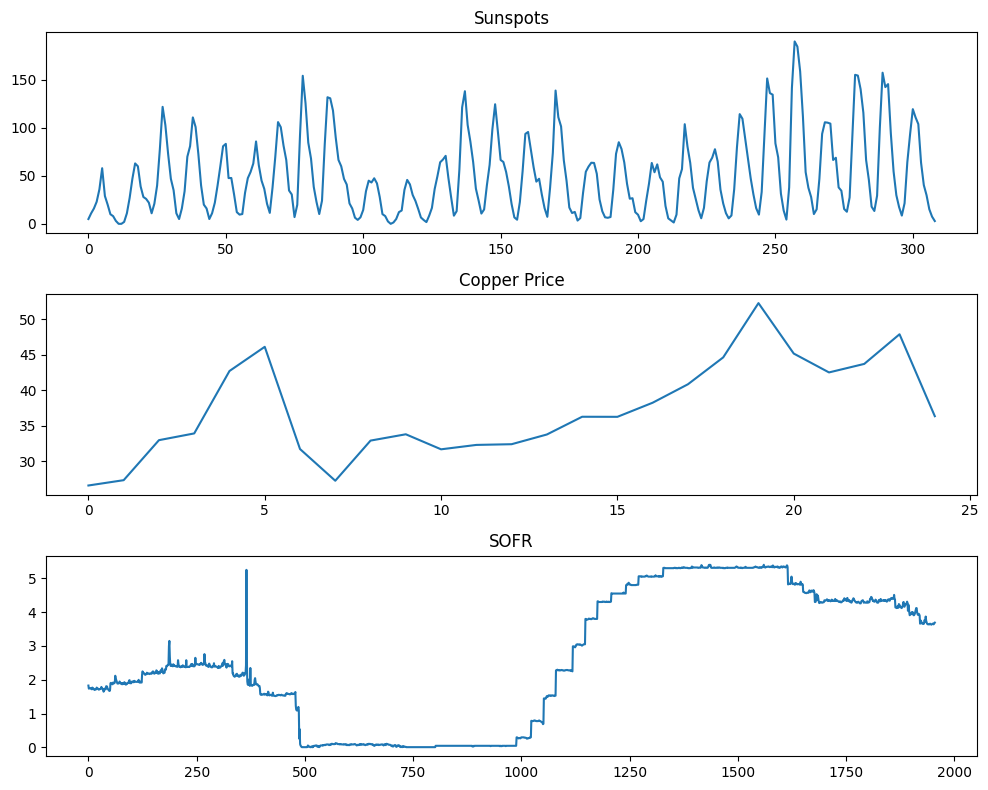

In [17]:
# Problem 1
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

axes[0].plot(sunspots.values)
axes[0].set_title("Sunspots")

axes[1].plot(copper.values)
axes[1].set_title("Copper Price")

axes[2].plot(sofr.values)
axes[2].set_title("SOFR")

plt.tight_layout()
plt.show()


In [18]:
# Problem 3: Generate
T = 500
w = np.random.normal(0, 1, size=T + 1)

x = w[1:] * w[:-1]
y = x**2


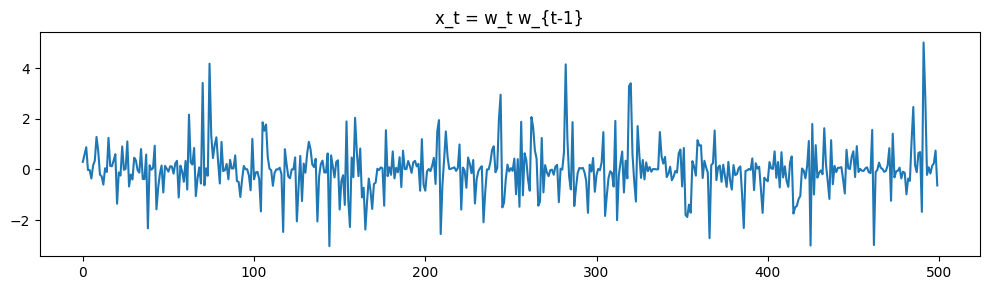

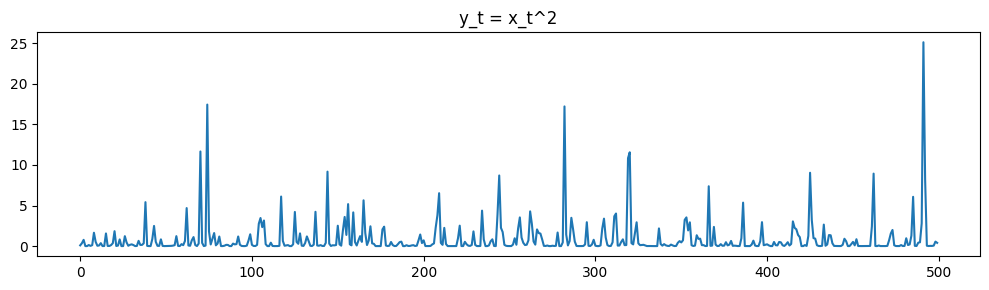

In [19]:
# Problem 3: Time series plot of x_t and y_t
plt.figure(figsize=(10, 3))
plt.plot(x)
plt.title("x_t = w_t w_{t-1}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(y)
plt.title("y_t = x_t^2")
plt.tight_layout()
plt.show()

In [20]:
# Problem 4: function for ACF plot, rho_1=0 test at 95% level, Ljung–Box
def analyze_series(series, name, difference=False, acf_lags=40, lb_lags=20):
    s = pd.Series(series).dropna()
    if difference:
        s = s.diff().dropna()
        name = f"Δ({name})"

    n = len(s)
    r = acf(s.values, nlags=acf_lags, fft=True)

    plt.figure(figsize=(10, 3))
    plt.stem(range(len(r)), r, basefmt=" ")
    plt.title(f"Sample ACF: {name}")
    plt.tight_layout()
    plt.show()

    r1 = r[1]
    z = r1 * np.sqrt(n)
    pval_r1 = 2 * (1 - norm.cdf(abs(z)))

    # (3) Ljung–Box test
    lb = acorr_ljungbox(s.values, lags=[lb_lags], return_df=True)
    pval_lb = float(lb["lb_pvalue"].iloc[0])

    return {
        "series": name,
        "n": int(n),
        "r1": float(r1),
        "rho1_pvalue": float(pval_r1),
        "lb_lags": int(lb_lags),
        "ljung_box_pvalue": float(pval_lb),
    }

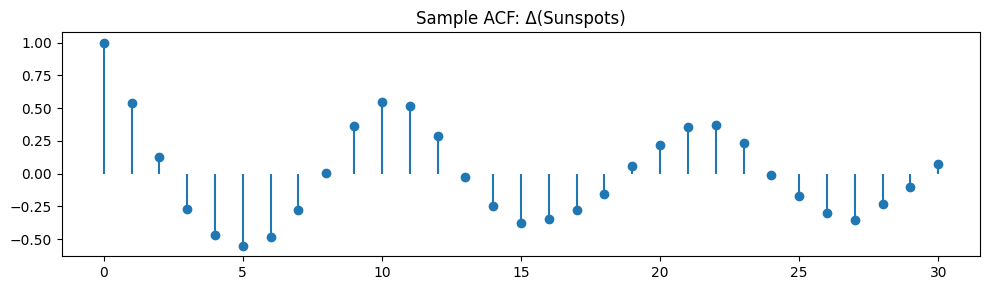

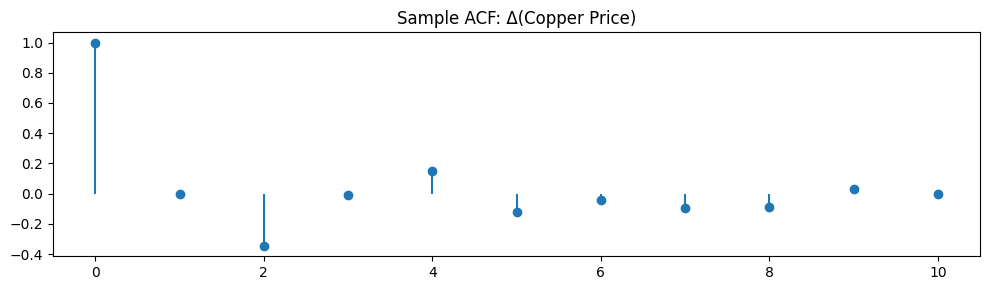

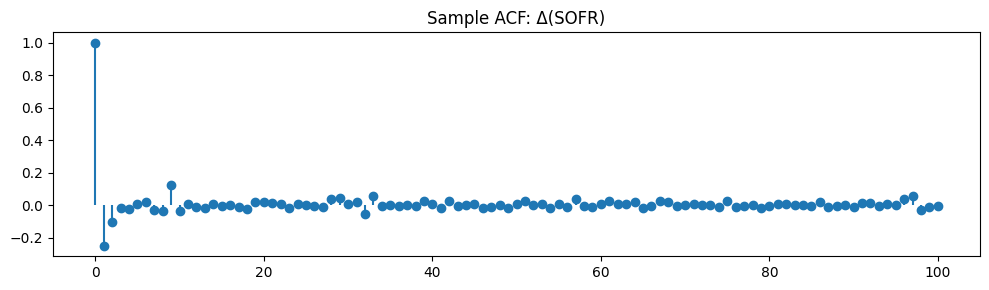

,series,n,r1,rho1_pvalue,lb_lags,ljung_box_pvalue
0,Δ(Sunspots),308,0.541165,0.000000,15,2.646228e-138
1,Δ(Copper Price),24,-0.004532,0.982287,5,4.681761e-01
2,Δ(SOFR),1955,-0.250966,0.000000,50,6.925701e-22


In [22]:
# Problem 4: all three series being non-stationary, so did difference-based test
res_sunspots = analyze_series(sunspots, "Sunspots", difference=True, acf_lags=30, lb_lags=15)
res_copper   = analyze_series(copper, "Copper Price", difference=True, acf_lags=10, lb_lags=5)
res_sofr     = analyze_series(sofr, "SOFR", difference=True, acf_lags=100, lb_lags=50)
pd.DataFrame([res_sunspots, res_copper, res_sofr])